In [28]:
import pandas as pd
import os
import torch
import json

In [29]:
%run Config.ipynb

In [30]:
config = Config()

#### Rmsd's 

In [31]:
rmsd = pd.read_csv("Data/rmsd.csv")

In [32]:
rmsd['pdb'].nunique()

285

Obs: There is one pdb missing!

In [33]:
rmsd[rmsd['pdb'] == "4kz6"]['poserank'].value_counts()

1     5
2     5
3     5
4     5
5     5
6     5
7     5
8     5
9     5
10    5
Name: poserank, dtype: int64

#### H bond counts

In [35]:
#H_bond_counts_docking = pd.read_csv("H_bond_counts_docking.csv")[['pdb_docking','poserank_docking','Ligand_H_received_docking','Ligand_H_donation_docking']]

In [36]:
#H_bond_counts_exp = pd.read_csv("H_bond_counts_exp.csv")[['pdb_exp','Ligand_H_received_exp','Ligand_H_donation_exp']]
#
#H_bond_counts = pd.merge(H_bond_counts_docking, H_bond_counts_exp, left_on = ["pdb_docking"], right_on = ["pdb_exp"], how = "inner")
#
#H_bond_counts["Ligand_H_received_diff"] = abs(H_bond_counts['Ligand_H_received_exp'] - H_bond_counts['Ligand_H_received_docking'])
#H_bond_counts["Ligand_H_donation_diff"] = abs(H_bond_counts['Ligand_H_donation_exp'] - H_bond_counts['Ligand_H_donation_docking'])

In [122]:
#df = pd.merge(rmsd, H_bond_counts[['pdb_docking','poserank_docking','Ligand_H_received_diff','Ligand_H_donation_diff']], left_on = ["pdb","poserank"], right_on = ["pdb_docking","poserank_docking"], how = "inner").drop(columns = ['pdb_docking','poserank_docking'])

In [123]:
#df.sort_values(['pdb','poserank']).head()

Complexes are labeled as correct if they fall within 2.0 Angstroms heavy-atom RMSD of the reference ligand structure, a standard cutoff in the field (see e.g. Ref. 44). Correct poses are labeled “positive,” and those that fall outside the cutoff are labeled as “negative.”

#### Creating label 

In [37]:
label = rmsd[["pdb","poserank", "RMSD"]]

In [38]:
label.head()

,pdb,poserank,RMSD
0,4eor,1,2.51
1,4eor,2,0.83
2,4eor,3,2.88
3,4eor,4,2.88
4,4eor,5,3.80


In [39]:
label["pdb"].nunique()

285

<AxesSubplot:>

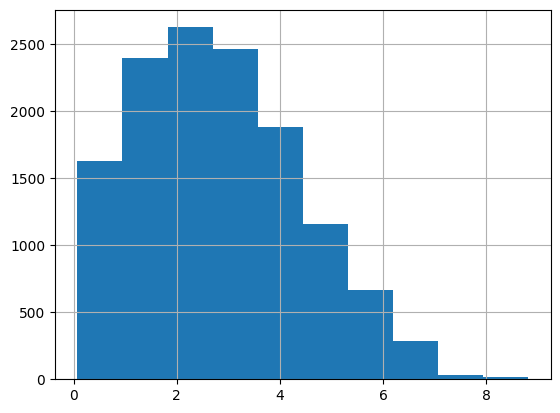

In [40]:
label['RMSD'].hist()

In [41]:
label['RMSD'].sort_values(ascending = False).head()

7236     8.82
9865     8.82
4607     8.82
1978     8.82
12494    8.82
Name: RMSD, dtype: float64

In [42]:
if config.label_args['class_def'] == config.label_args['class_def']:
    label["label"] = label["RMSD"].apply(lambda x: 1 if x <= 2 else 0)

In [43]:
label.head()

,pdb,poserank,RMSD,label
0,4eor,1,2.51,0
1,4eor,2,0.83,1
2,4eor,3,2.88,0
3,4eor,4,2.88,0
4,4eor,5,3.80,0


In [44]:
label['label'].value_counts()

0    8570
1    4575
Name: label, dtype: int64

In [45]:
len(label['label'])

13145

In [46]:
label['pdb'].nunique()

285

In [47]:
import pandas as pd

In [48]:
score = pd.read_json("Data/score.json")

In [49]:
score['4mme']

1     82.978723
2     19.148936
3      7.446809
4      2.127660
5     20.212766
6      5.319149
7      2.127660
8      0.000000
9      0.000000
10     0.000000
Name: 4mme, dtype: float64

In [50]:
len(score.columns)

285

#### Creating dict 

In [51]:
# Create the nested dictionary
result_dict = {}
for index, row in label.iterrows():
    pdb = row['pdb']
    poserank = row['poserank']
    label = row['label']
    
    if pdb not in result_dict:
        result_dict[pdb] = {}
    
    result_dict[pdb][poserank] = label

In [52]:
# Assuming result_dict is your dictionary
with open(f"{config.data}/label.json", "w") as json_file:
    json.dump(result_dict, json_file)

In [53]:
# Assuming result_dict is your dictionary
with open(f"{config.data}/label.json", "r") as json_file:
    result = json_file.read()

In [54]:
result = pd.read_json(f"{config.data}/label.json")

In [56]:
result

,4eor,2qbq,3g2n,1ydr,3uev,2xnb,3qqs,1w4o,4jxs,3zsx,...,4ddh,3oe4,3g31,4jsz,3udh,4w9l,2cbv,4j28,2j78,3bgz
1,0.0,1,1,1,1,1,0,1,1,0,...,1.0,1,0,0,1,1,1.0,1,1,1.0
2,1.0,1,1,0,1,0,1,1,1,0,...,0.0,1,0,0,0,1,1.0,1,0,0.0
3,0.0,0,1,1,1,1,0,0,1,1,...,0.0,0,0,0,0,1,0.0,1,0,0.0
4,0.0,1,1,0,0,0,0,1,1,0,...,0.0,0,0,0,0,0,0.0,1,0,0.0
5,0.0,0,0,0,1,0,0,1,0,0,...,0.0,0,0,0,0,0,0.0,1,0,0.0
6,0.0,0,0,1,1,1,0,0,1,0,...,0.0,0,1,1,1,0,1.0,1,0,0.0
7,0.0,0,0,0,1,0,0,0,1,0,...,0.0,0,0,1,0,0,0.0,1,0,0.0
8,0.0,0,1,0,0,0,0,0,1,0,...,1.0,0,0,1,0,0,0.0,0,0,0.0
9,0.0,0,0,1,0,0,0,0,1,1,...,0.0,0,0,1,1,0,0.0,1,0,1.0
10,NaN,1,0,0,0,0,0,0,0,0,...,NaN,0,0,1,0,0,NaN,0,0,NaN
